In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import seaborn as sns
sns.set()

In [2]:
cabdata = pd.read_csv("/Users/kashishhj/repos/DataSets/Cab_Data.csv")

In [3]:
city = pd.read_csv("/Users/kashishhj/repos/DataSets/City.csv")

In [4]:
trancation = pd.read_csv("/Users/kashishhj/repos/DataSets/Transaction_ID.csv")

In [5]:
holidaydata = pd.read_csv("/Users/kashishhj/repos/DataSets/US Holiday Dates (2004-2021).csv")

In [6]:
customer = pd.read_csv("/Users/kashishhj/repos/DataSets/Customer_ID.csv")

In [7]:
from datetime import datetime, timedelta

In [8]:
def to_date_format(n):
    date_str =(datetime(1899,12,30) + timedelta(n-1)).strftime("%d-%m-%Y")
    date_date =  datetime.strptime(date_str, "%d-%m-%Y")
    return date_date

In [9]:
cabdata['Date of Travel']=cabdata['Date of Travel'].apply(lambda x:to_date_format(x))



In [10]:
cabdata=cabdata.sort_values(by=['Date of Travel'])
cabdata=cabdata.reset_index(drop= True )

print('Filas =',cabdata.shape[0], '  y   Columnas = ', cabdata.shape[1])
cabdata.head(10)



Filas = 359392   y   Columnas =  7


,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10001340,2016-01-01,Yellow Cab,WASHINGTON DC,10.20,202.54,135.8640
1,10000640,2016-01-01,Yellow Cab,CHICAGO IL,15.60,374.66,209.6640
2,10000635,2016-01-01,Yellow Cab,CHICAGO IL,25.08,532.83,337.0752
3,10001001,2016-01-01,Yellow Cab,NEW YORK NY,46.80,1391.91,595.2960
4,10000171,2016-01-01,Pink Cab,SAN DIEGO CA,14.28,269.15,147.0840
5,10001009,2016-01-01,Yellow Cab,PHOENIX AZ,30.00,1000.52,403.2000
6,10000605,2016-01-01,Yellow Cab,CHICAGO IL,35.52,760.86,430.5024
7,10001014,2016-01-01,Yellow Cab,SACRAMENTO CA,38.00,1065.42,547.2000
8,10000600,2016-01-01,Yellow Cab,CHICAGO IL,23.75,531.25,336.3000
9,10000182,2016-01-01,Pink Cab,SAN DIEGO CA,2.36,47.89,23.6000


In [11]:
holidaydata['Date'] = pd.to_datetime(holidaydata['Date'])
holidaydata.dtypes

Date       datetime64[ns]
Holiday            object
WeekDay            object
Month               int64
Day                 int64
Year                int64
dtype: object

In [12]:
city['Population'] = [x.replace(',','') for x in city['Population']]
city['Users'] = [x.replace(',','') for x in city['Users']]
city['Population'] = city['Population'].astype(float)
city['Users'] = city['Users'].astype(float)
city.dtypes

City           object
Population    float64
Users         float64
dtype: object

In [13]:
masterdata = cabdata.merge(trancation, on= 'Transaction ID').merge(customer, on ='Customer ID').merge(city, on = 'City')

In [14]:
masterdata["Date"] = holidaydata["Date"]
masterdata

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users,Date
0,10001340,2016-01-01,Yellow Cab,WASHINGTON DC,10.20,202.54,135.8640,52536,Card,Male,24,10606,418859.0,127001.0,2004-07-04
1,10020018,2016-03-25,Yellow Cab,WASHINGTON DC,5.94,88.50,74.1312,52536,Cash,Male,24,10606,418859.0,127001.0,2005-07-04
2,10102932,2016-11-08,Pink Cab,WASHINGTON DC,15.21,179.33,153.6210,52536,Cash,Male,24,10606,418859.0,127001.0,2006-07-04
3,10164725,2017-04-16,Yellow Cab,WASHINGTON DC,8.08,123.21,104.7168,52536,Card,Male,24,10606,418859.0,127001.0,2007-07-04
4,10188478,2017-06-23,Yellow Cab,WASHINGTON DC,13.80,283.74,168.9120,52536,Cash,Male,24,10606,418859.0,127001.0,2008-07-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10433605,2018-12-24,Pink Cab,PITTSBURGH PA,21.66,345.03,246.9240,49629,Card,Female,48,27228,542085.0,3643.0,NaT
359388,10433603,2018-12-27,Pink Cab,PITTSBURGH PA,6.79,119.55,67.9000,49372,Cash,Female,44,22278,542085.0,3643.0,NaT
359389,10435910,2018-12-28,Yellow Cab,PITTSBURGH PA,18.81,372.10,252.8064,48042,Cash,Female,33,7830,542085.0,3643.0,NaT
359390,10435908,2018-12-28,Yellow Cab,PITTSBURGH PA,30.80,538.31,413.9520,48061,Card,Female,32,22408,542085.0,3643.0,NaT


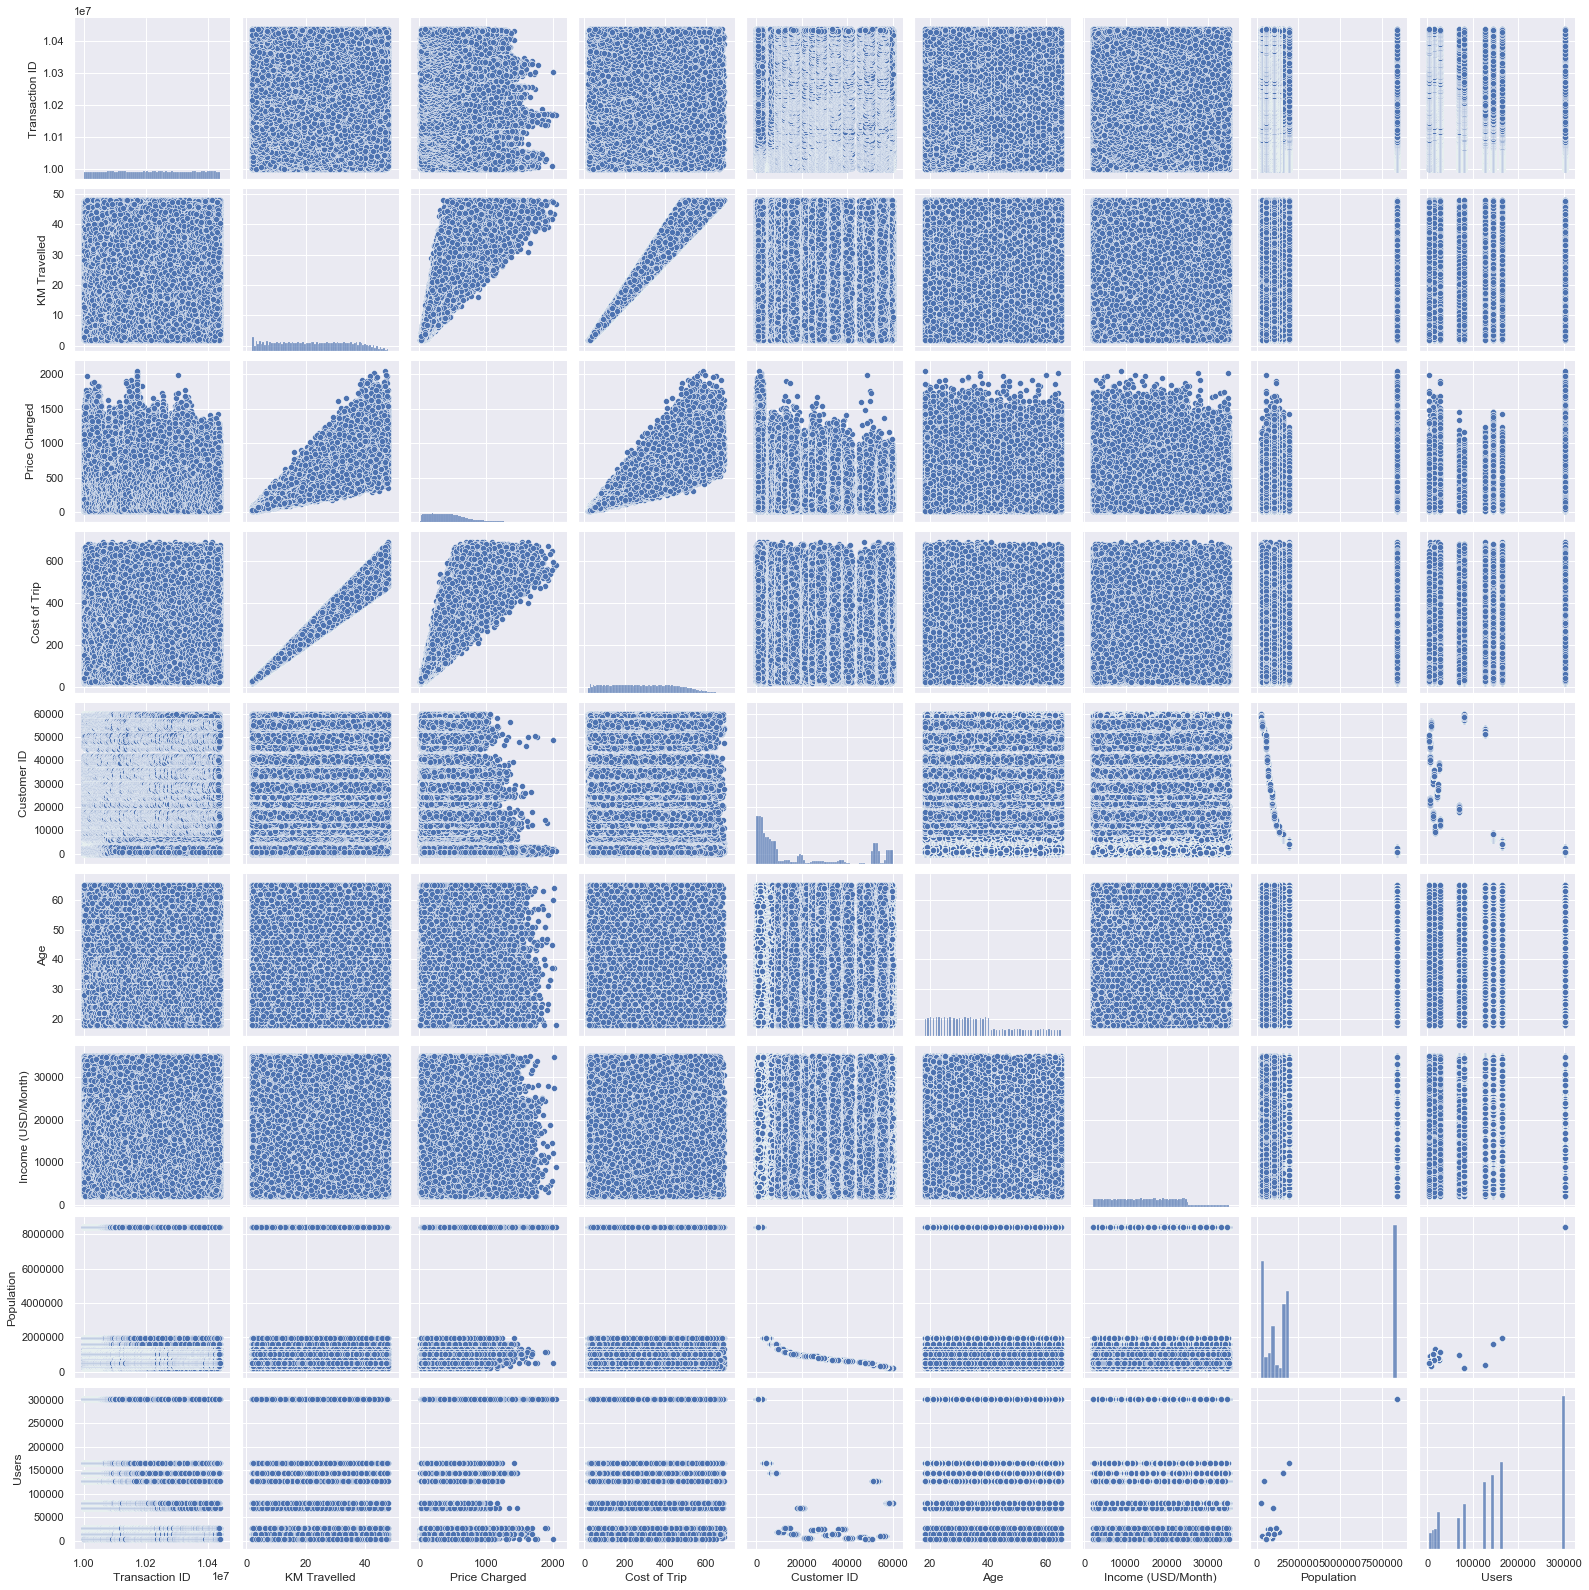

In [17]:
sns.pairplot(masterdata)

In [18]:
masterdata['Income (USD/Month)'] = masterdata['Income (USD/Month)'].astype(float)
masterdata['Population'] = masterdata['Population'].astype(int)
masterdata['Users'] = masterdata['Users'].astype(int)
masterdata.dtypes

Transaction ID                 int64
Date of Travel        datetime64[ns]
Company                       object
City                          object
KM Travelled                 float64
Price Charged                float64
Cost of Trip                 float64
Customer ID                    int64
Payment_Mode                  object
Gender                        object
Age                            int64
Income (USD/Month)           float64
Population                     int64
Users                          int64
Date                  datetime64[ns]
dtype: object

In [19]:
masterdata.apply(lambda x: sum(x.isnull()),axis=0)

Transaction ID             0
Date of Travel             0
Company                    0
City                       0
KM Travelled               0
Price Charged              0
Cost of Trip               0
Customer ID                0
Payment_Mode               0
Gender                     0
Age                        0
Income (USD/Month)         0
Population                 0
Users                      0
Date                  359050
dtype: int64

In [20]:
duplicated_rows = masterdata[masterdata.duplicated()]
print('The number of duplicated rows', duplicated_rows.shape[0])

The number of duplicated rows 0


In [21]:
masterdata['Year of Travel'] = masterdata['Date of Travel'].dt.year
masterdata['Month of Travel'] = masterdata['Date of Travel'].dt.month
masterdata['Day of Travel'] = masterdata['Date of Travel'].dt.day
masterdata['Profit'] = masterdata['Price Charged'] -masterdata['Cost of Trip']

In [22]:
masterdata_st=masterdata.set_index('Date of Travel')

In [23]:
masterdata_st.sort_values('Date of Travel').head()

,Transaction ID,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users,Date,Year of Travel,Month of Travel,Day of Travel,Profit
Date of Travel,,,,,,,,,,,,,,,,,,
2016-01-01,10001340,Yellow Cab,WASHINGTON DC,10.20,202.54,135.8640,52536,Card,Male,24,10606.0,418859,127001,2004-07-04,2016,1,1,66.6760
2016-01-01,10001254,Yellow Cab,SILICON VALLEY,42.12,1342.05,520.6032,13894,Card,Male,32,21898.0,1177609,27247,NaT,2016,1,1,821.4468
2016-01-01,10001242,Yellow Cab,SILICON VALLEY,18.02,658.65,240.0264,14513,Card,Male,62,3892.0,1177609,27247,NaT,2016,1,1,418.6236
2016-01-01,10000885,Yellow Cab,NEW YORK NY,32.20,940.73,452.0880,1698,Card,Male,23,22120.0,8405837,302149,NaT,2016,1,1,488.6420
2016-01-01,10000961,Yellow Cab,NEW YORK NY,19.04,634.46,253.6128,85,Card,Male,19,19765.0,8405837,302149,NaT,2016,1,1,380.8472


In [24]:
yellowcabst= masterdata_st[masterdata_st.Company.isin(['Yellow Cab'])]
print(yellowcabst.shape)
yellowcabst.head()
yellowcab= masterdata[masterdata.Company.isin(['Yellow Cab'])]
print(yellowcab.shape)
yellowcab.head()

(274681, 18)
(274681, 19)


,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users,Date,Year of Travel,Month of Travel,Day of Travel,Profit
0,10001340,2016-01-01,Yellow Cab,WASHINGTON DC,10.20,202.54,135.8640,52536,Card,Male,24,10606.0,418859,127001,2004-07-04,2016,1,1,66.6760
1,10020018,2016-03-25,Yellow Cab,WASHINGTON DC,5.94,88.50,74.1312,52536,Cash,Male,24,10606.0,418859,127001,2005-07-04,2016,3,25,14.3688
3,10164725,2017-04-16,Yellow Cab,WASHINGTON DC,8.08,123.21,104.7168,52536,Card,Male,24,10606.0,418859,127001,2007-07-04,2017,4,16,18.4932
4,10188478,2017-06-23,Yellow Cab,WASHINGTON DC,13.80,283.74,168.9120,52536,Cash,Male,24,10606.0,418859,127001,2008-07-04,2017,6,23,114.8280
6,10261473,2017-11-16,Yellow Cab,WASHINGTON DC,11.60,180.50,144.7680,52536,Cash,Male,24,10606.0,418859,127001,2010-07-04,2017,11,16,35.7320


In [25]:
pinkcabst= masterdata_st[masterdata_st.Company.isin(['Pink Cab'])]
print(pinkcabst.shape)
pinkcabst.head()
pinkcab= masterdata[masterdata.Company.isin(['Pink Cab'])]
print(pinkcab.shape)
pinkcab.head()

(84711, 18)
(84711, 19)


,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users,Date,Year of Travel,Month of Travel,Day of Travel,Profit
2,10102932,2016-11-08,Pink Cab,WASHINGTON DC,15.21,179.33,153.621,52536,Cash,Male,24,10606.0,418859,127001,2006-07-04,2016,11,8,25.709
5,10249981,2017-10-30,Pink Cab,WASHINGTON DC,28.00,424.20,280.000,52536,Card,Male,24,10606.0,418859,127001,2009-07-04,2017,10,30,144.200
19,10242139,2017-10-19,Pink Cab,WASHINGTON DC,26.78,371.96,313.326,53683,Card,Male,26,9389.0,418859,127001,2005-12-25,2017,10,19,58.634
29,10143658,2017-02-10,Pink Cab,WASHINGTON DC,42.55,504.03,489.325,53126,Cash,Male,24,3032.0,418859,127001,2015-12-25,2017,2,10,14.705
63,10125156,2016-12-20,Pink Cab,WASHINGTON DC,10.00,151.06,104.000,51580,Card,Male,51,6115.0,418859,127001,2010-10-11,2016,12,20,47.060


In [26]:
q=masterdata.groupby(['Company', 'Year of Travel']).Profit.sum().to_frame('Profit')
q.head()

Profit
Company    Year of Travel              
Pink Cab   2016            1.739883e+06
           2017            2.015101e+06
           2018            1.552345e+06
Yellow Cab 2016            1.407389e+07
           2017            1.646427e+07

In [27]:
w=masterdata.groupby(['Company', 'Year of Travel'])['Price Charged'].sum().to_frame('Price')

In [28]:
w.head()

Price
Company    Year of Travel              
Pink Cab   2016            7.986269e+06
           2017            9.530736e+06
           2018            8.811246e+06
Yellow Cab 2016            3.883363e+07
           2017            4.558291e+07

In [29]:
w['Profit%'] =(q['Profit']*100) /w['Price']

In [30]:
w.head(6)

Price    Profit%
Company    Year of Travel                         
Pink Cab   2016            7.986269e+06  21.785926
           2017            9.530736e+06  21.143179
           2018            8.811246e+06  17.617770
Yellow Cab 2016            3.883363e+07  36.241491
           2017            4.558291e+07  36.119383
           2018            4.143734e+07  32.536399

In [31]:
y=yellowcabst.Profit.resample('Y').sum()
ypy= pd.DataFrame(y)
p=pinkcabst.Profit.resample('Y').sum()
ppy= pd.DataFrame(p)
print(ypy)
print(ppy)
y=yellowcabst.Profit.resample('m').sum()
ypm= pd.DataFrame(y)
p=pinkcabst.Profit.resample('m').sum()
ppm= pd.DataFrame(p)

                      Profit
Date of Travel              
2016-12-31      1.407389e+07
2017-12-31      1.646427e+07
2018-12-31      1.348222e+07
                     Profit
Date of Travel             
2016-12-31      1739882.628
2017-12-31      2015100.657
2018-12-31      1552345.036


In [32]:
ypy['ProfitORides']= ypy['Profit']/yellowcab['Date of Travel'].value_counts().resample('Y').sum()
ppy['ProfitORides']= ppy['Profit']/pinkcab['Date of Travel'].value_counts().resample('Y').sum()
ypm['ProfitORides']= ypm['Profit']/yellowcab['Date of Travel'].value_counts().resample('m').sum()
ppm['ProfitORides']= ppm['Profit']/pinkcab['Date of Travel'].value_counts().resample('m').sum()
ypy['ProfitOKM']= ypy['Profit']/yellowcabst['KM Travelled'].resample('Y').sum()
ppy['ProfitOKM']= ppy['Profit']/pinkcabst['KM Travelled'].resample('Y').sum()
ypm['ProfitOKM']= ypm['Profit']/yellowcabst['KM Travelled'].resample('m').sum()
ppm['ProfitOKM']= ppm['Profit']/pinkcabst['KM Travelled'].resample('m').sum()

In [33]:
def add_value_labels(ax, spacing=5):
    """Add labels to the end of each bar in a bar chart.

    Arguments:
        ax (matplotlib.axes.Axes): The matplotlib object containing the axes
            of the plot to annotate.
        spacing (int): The distance between the labels and the bars.
    """

    # For each bar: Place a label
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        label = "${:.0f}".format(y_value)

        # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va, fontsize=12)                      # Vertically align label differently for
                                        # positive and negative values.


# Call the function above. All the magic happens there.
add_value_labels(ax)

NameError: name 'ax' is not defined

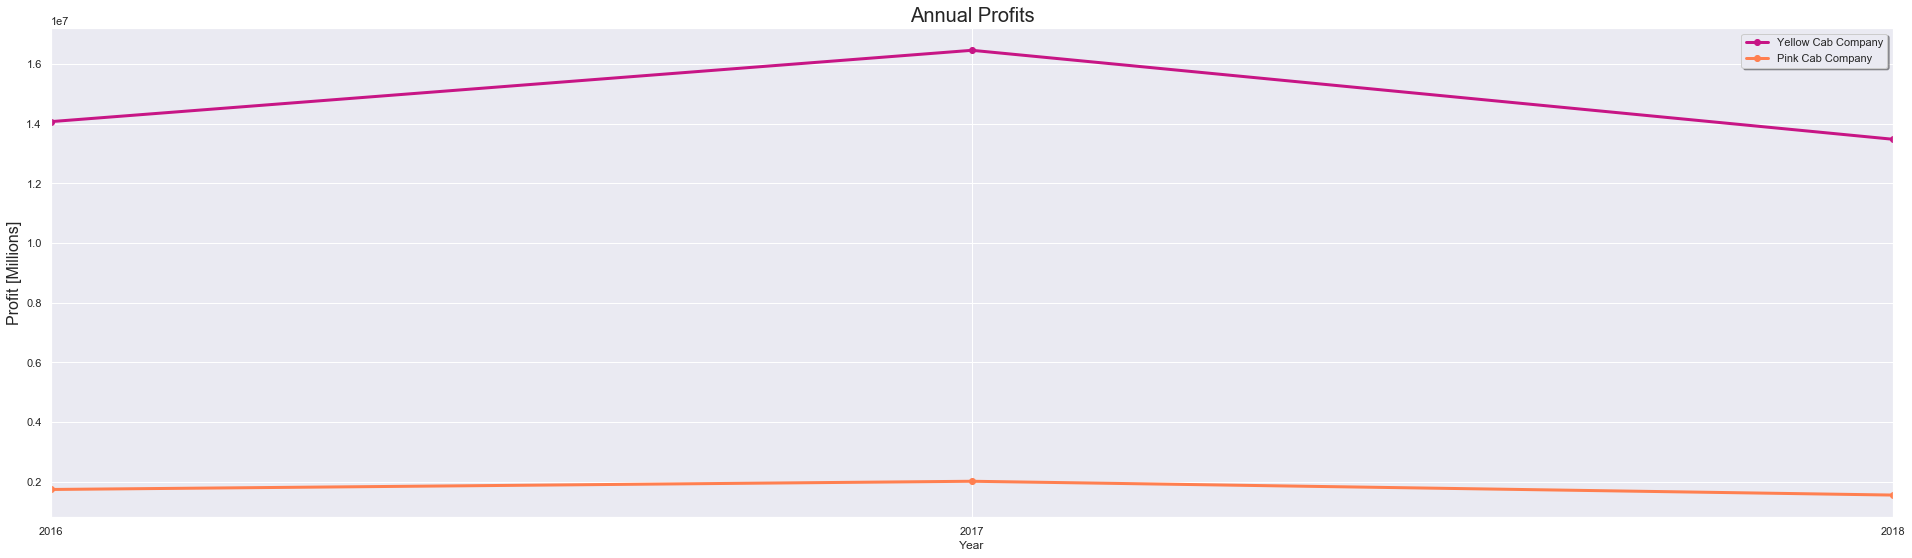

In [34]:
plt.figure(figsize=(33,9))

fig= yellowcabst.Profit.resample('Y').sum().plot.line(color = 'mediumvioletred',label='Yellow Cab Company',linewidth=3, marker='o')
fig=pinkcabst.Profit.resample('Y').sum().plot.line(color = 'coral',label='Pink Cab Company',linewidth=3, marker='o')
plt.ylabel('Profit [Millions]', fontsize=16)
plt.title('Annual Profits',fontsize=20)
plt.xlabel('Year')

plt.legend(loc='best', shadow=True)


In [35]:
round(masterdata.groupby(['Company']).Profit.sum().to_frame('Total Profit'),0)

,Total Profit
Company,
Pink Cab,5307328.0
Yellow Cab,44020373.0


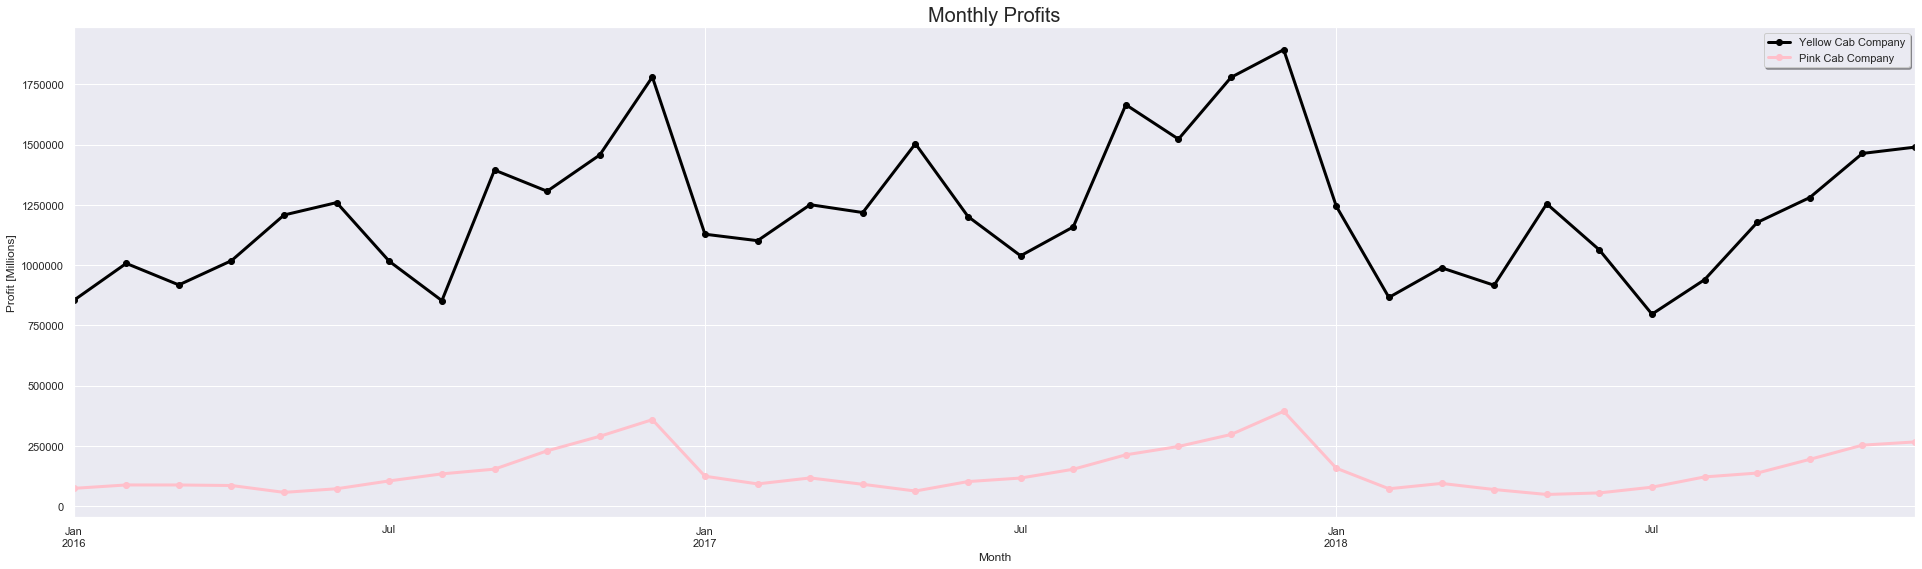

In [38]:
plt.figure(figsize=(33,9))

fig= yellowcabst.Profit.resample('m').sum().plot.line(color = 'black',label='Yellow Cab Company',linewidth=3, marker ='o')
fig=pinkcabst.Profit.resample('m').sum().plot.line(color = 'pink',label='Pink Cab Company',linewidth=3, marker='o')
plt.ylabel('Profit [Millions]')
plt.title('Monthly Profits',fontsize=20)
plt.xlabel('Month')
plt.legend(loc='best', shadow=True)

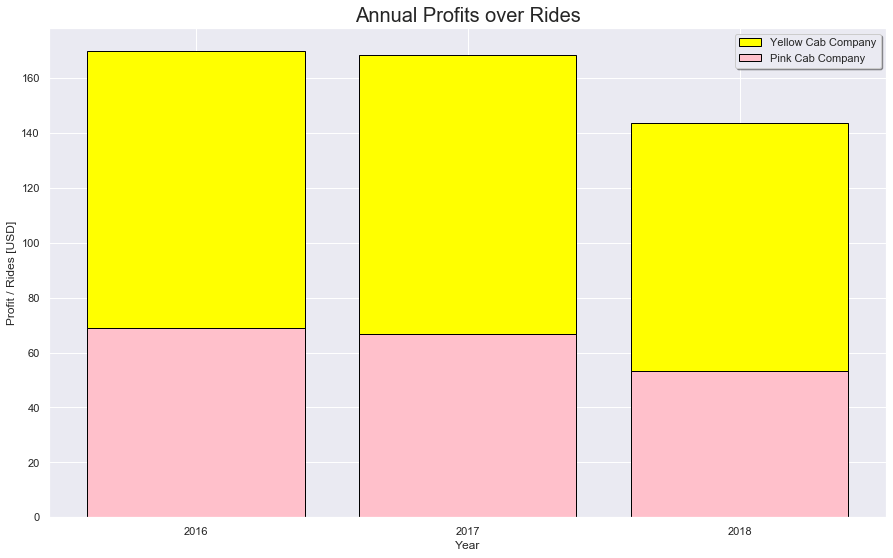

In [46]:
plt.figure(figsize=(33,9))
plt.subplot(1,2,2)
x1= ypy.ProfitORides.resample('Y').sum()
x2= ppy.ProfitORides.resample('Y').sum()
plt.bar(x= x1.index.strftime('%Y'), height='ProfitORides', data = ypy,color = 'yellow',edgecolor = 'black',label='Yellow Cab Company')
plt.bar(x= x2.index.strftime('%Y'), height='ProfitORides', data = ppy, color = 'pink',edgecolor = 'black',label='Pink Cab Company')
plt.xticks(rotation=0)
plt.title('Annual Profits over Rides',fontsize=20)
plt.ylabel('Profit / Rides [USD]')
plt.xlabel('Year')
plt.legend(loc='upper right', shadow=True)

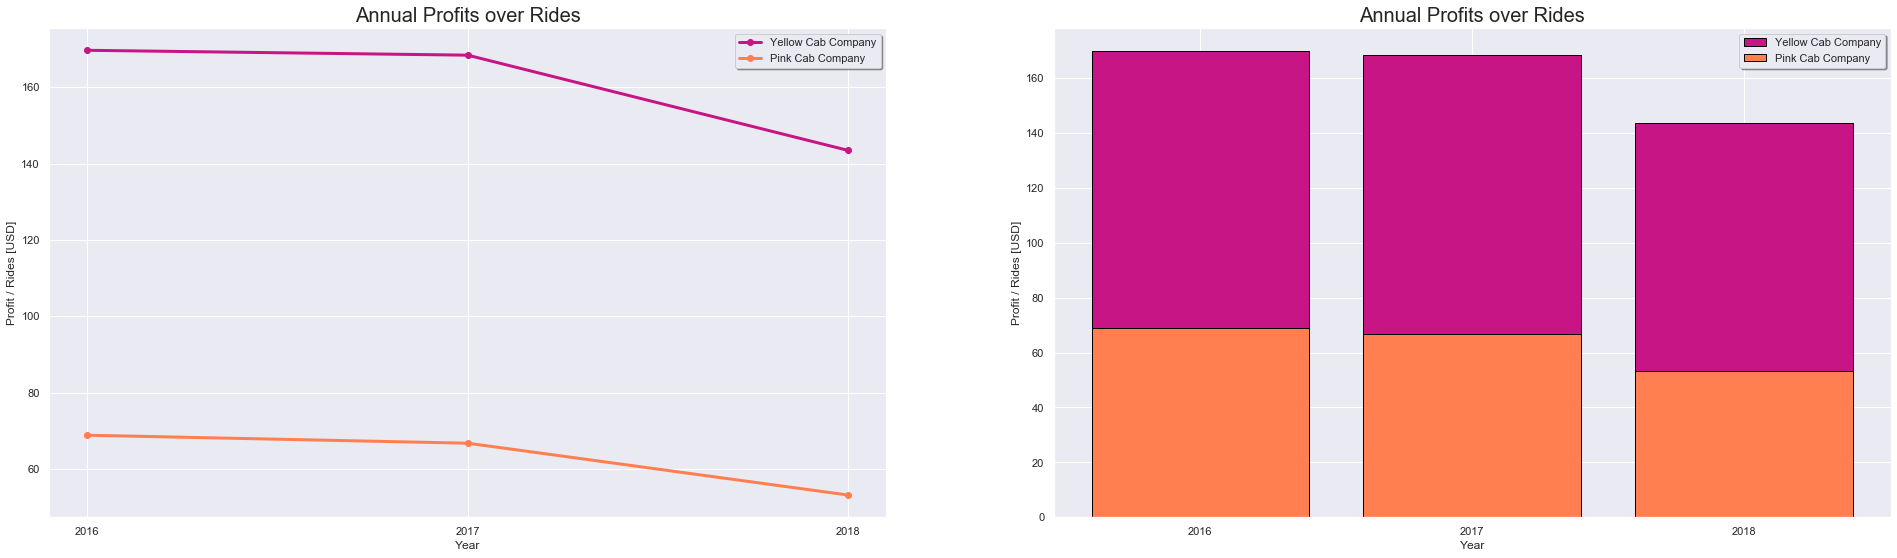

In [40]:
plt.figure(figsize=(33,9))

plt.subplot(1,2,2)
x1= ypy.ProfitORides.resample('Y').sum()
x2= ppy.ProfitORides.resample('Y').sum()
plt.bar(x= x1.index.strftime('%Y'), height='ProfitORides', data = ypy,color = 'mediumvioletred',edgecolor = 'black',label='Yellow Cab Company')
plt.bar(x= x2.index.strftime('%Y'), height='ProfitORides', data = ppy, color = 'coral',edgecolor = 'black',label='Pink Cab Company')
plt.xticks(rotation=0)
plt.title('Annual Profits over Rides',fontsize=20)
plt.ylabel('Profit / Rides [USD]')
plt.xlabel('Year')
plt.legend(loc='upper right', shadow=True)

plt.subplot(1,2,1)
x1= ypy.ProfitORides.resample('Y').sum()
x2= ppy.ProfitORides.resample('Y').sum()
plt.plot(x1.index.strftime('%Y'),'ProfitORides', data = ypy,color = 'mediumvioletred',label='Yellow Cab Company',linewidth=3, marker = 'o')
plt.plot(x2.index.strftime('%Y'),'ProfitORides', data = ppy, color = 'coral',label='Pink Cab Company',linewidth=3, marker='o')
plt.xticks(rotation=0)
plt.title('Annual Profits over Rides',fontsize=20)
plt.ylabel('Profit / Rides [USD]')
plt.xlabel('Year')
plt.legend(loc='upper right', shadow=True)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

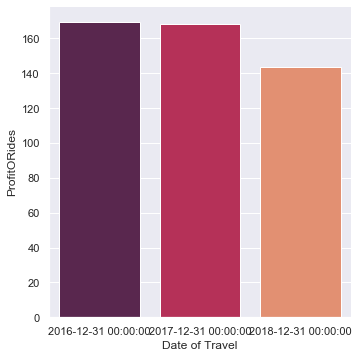

In [47]:
g=sns.catplot(ypy.index,'ProfitORides',data=ypy,kind='bar',palette = 'rocket')

ax = g.facet_axis(0,0)
for p in ax.patches:
    ax.text(p.get_x() + 0.125, 
            p.get_height() * 1.02, 
            "${:.2f}".format(p.get_height()), 
            color='black', rotation='horizontal', size='large')
años = ['2016','2017','2018']
mapeado = range(len(años))
plt.xticks(mapeado, años, rotation =0)
plt.title('Yearly PoR YellowCab Company',fontsize=15)
plt.ylabel('Profit / Rides [USD]')
plt.xlabel('Year')

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

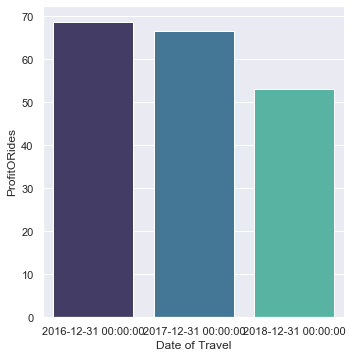

In [48]:
g=sns.catplot(ppy.index,'ProfitORides',data=ppy,kind='bar',palette = 'mako')

ax = g.facet_axis(0,0)
for p in ax.patches:
    ax.text(p.get_x() + 0.125, 
            p.get_height() * 1.02, 
            "${:.2f}".format(p.get_height()), 
            color='black', rotation='horizontal', size='large')
años = ['2016','2017','2018']
mapeado = range(len(años))
plt.xticks(mapeado, años, rotation =0)
plt.title('Yearly PoR PinkCab Company',fontsize=15)
plt.ylabel('Profit / Rides [USD]')
plt.xlabel('Year')

In [49]:
lista=[1,2,3,4,5,6,7,8,9,10,11,12]
lista=lista*3

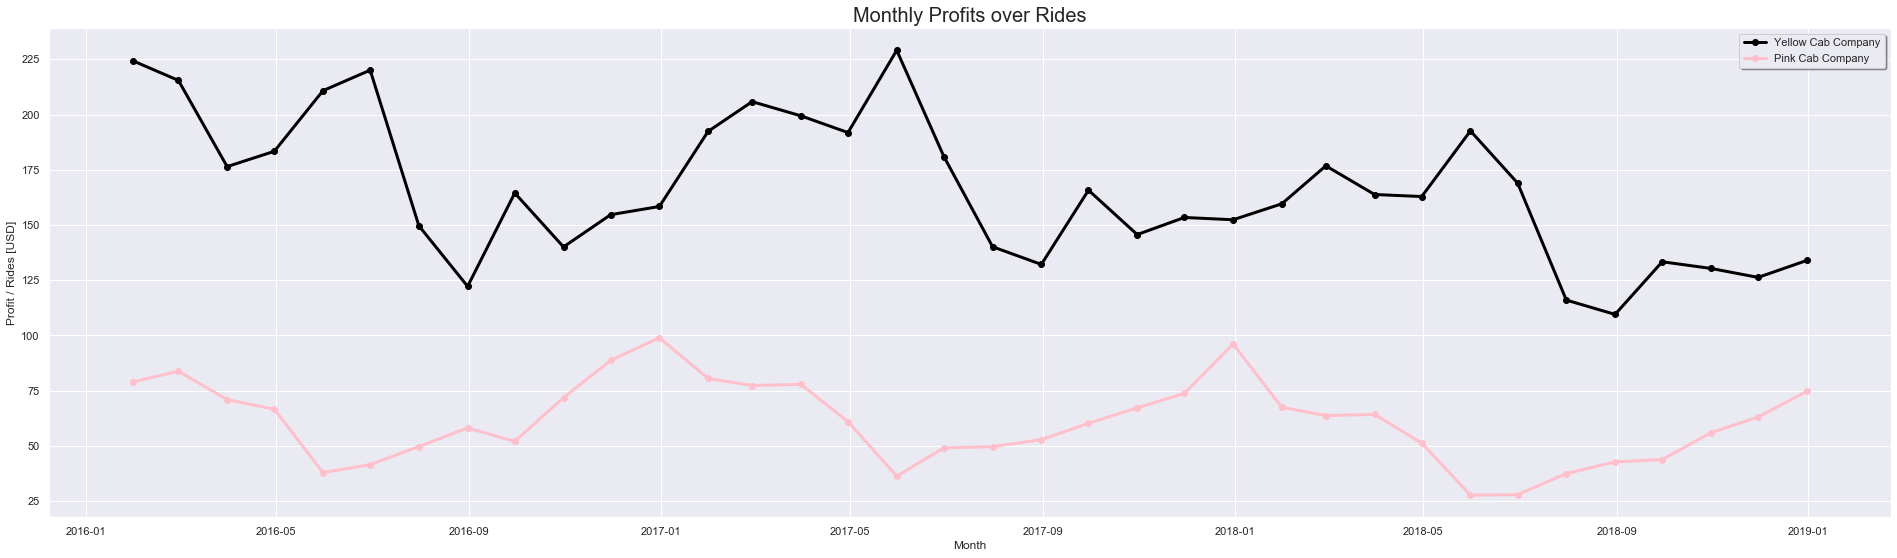

In [51]:
plt.figure(figsize=(33,9))

x1= ypm.ProfitORides.resample('m').sum()
x2= ppm.ProfitORides.resample('m').sum()
plt.plot(x1.index,'ProfitORides', data = ypm,color = 'Black', linewidth = 3,label='Yellow Cab Company', marker='o')
plt.plot(x2.index,'ProfitORides', data = ppm, color = 'Pink',linewidth = 3,label='Pink Cab Company', marker='o')
plt.xticks(rotation=0)
plt.title('Monthly Profits over Rides',fontsize=20)
plt.ylabel('Profit / Rides [USD]')
plt.xlabel('Month')
plt.legend(loc='upper right', shadow=True)

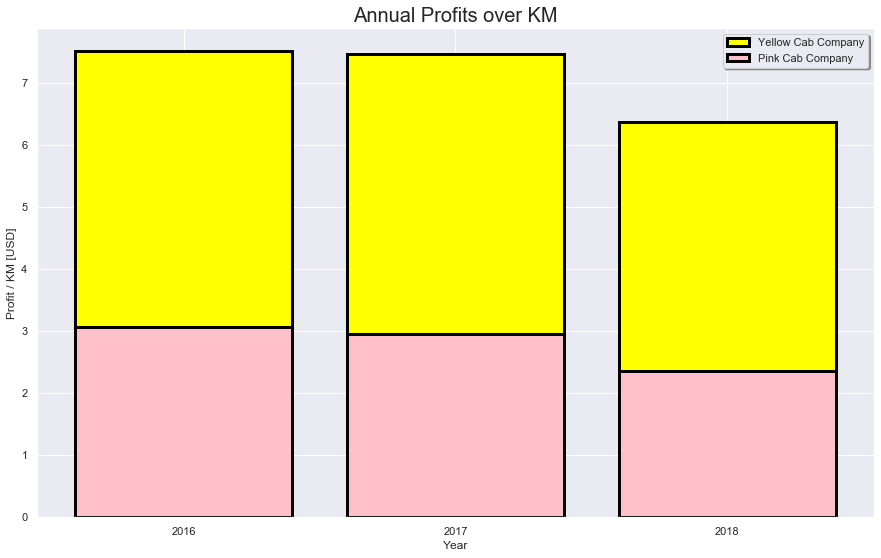

In [52]:
plt.figure(figsize=(33,9))

plt.subplot(1,2,2)
x1= ypy.ProfitOKM.resample('Y').sum()
x2= ppy.ProfitOKM.resample('Y').sum()
plt.bar(x= x1.index.strftime('%Y'), height='ProfitOKM', data = ypy,color = 'Yellow',edgecolor = 'black',label='Yellow Cab Company',linewidth=3)
plt.bar(x= x2.index.strftime('%Y'), height='ProfitOKM', data = ppy, color = 'Pink',edgecolor = 'black',label='Pink Cab Company',linewidth=3)
plt.xticks(rotation=0)
plt.title('Annual Profits over KM',fontsize=20)
plt.ylabel('Profit / KM [USD]')
plt.xlabel('Year')
plt.legend(loc='upper right', shadow=True)

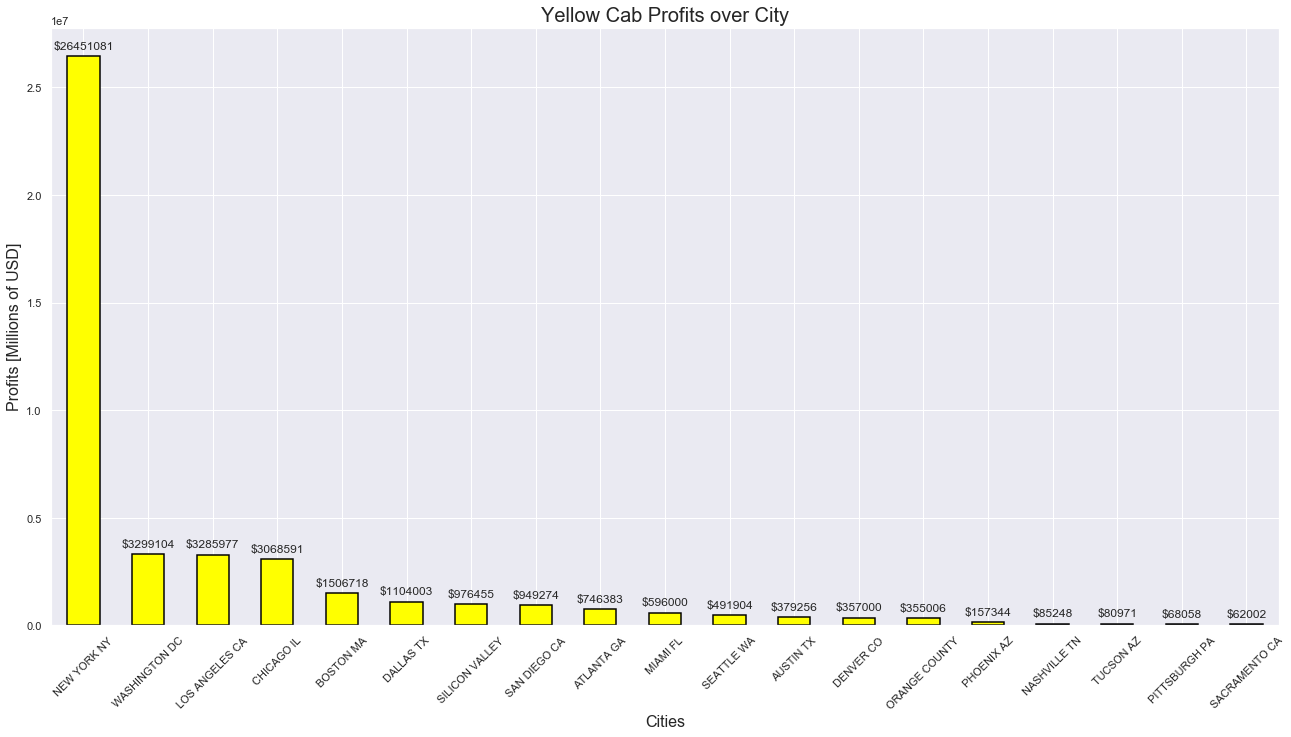

In [53]:
ppc= yellowcab.groupby('City').Profit.sum()
ppc= pd.DataFrame(ppc)
ppc = ppc.sort_values(by='Profit', ascending= False )
ppc.head()

plt.figure(figsize=(22,11))
fig= ppc.Profit.plot.bar(color = 'Yellow',edgecolor='black',linewidth=1.5)
plt.xticks(rotation=45)

plt.ylabel('Profits [Millions of USD]', fontsize=16)
plt.xlabel('Cities', fontsize=16)
plt.title('Yellow Cab Profits over City',fontsize=20)
add_value_labels(fig)

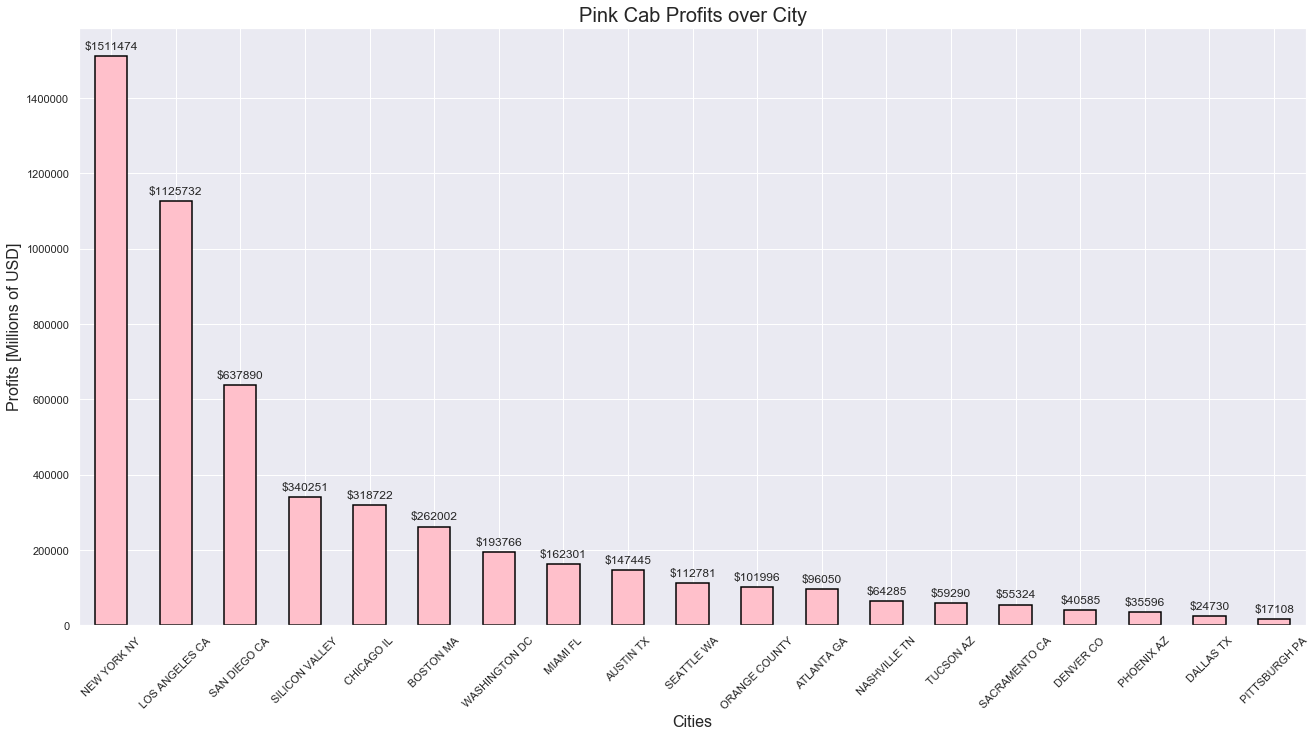

In [54]:
ppc= pinkcab.groupby('City').Profit.sum()
ppc= pd.DataFrame(ppc)
ppc = ppc.sort_values(by='Profit', ascending= False )
ppc.head()

plt.figure(figsize=(22,11))
fig= ppc.Profit.plot.bar(color = 'Pink',edgecolor='black',linewidth=1.5)
plt.xticks(rotation=45)

plt.ylabel('Profits [Millions of USD]', fontsize=16)
plt.xlabel('Cities', fontsize=16)
plt.title('Pink Cab Profits over City',fontsize=20)
add_value_labels(fig)

In [55]:
yellowcabnp=yellowcab[(yellowcab['Profit']<0)]
yellowcabnp= yellowcabnp.City.value_counts()
yellowcabnp=pd.DataFrame(yellowcabnp)
yellowcabnp.columns=['q']
pinkcabnp=pinkcab[(pinkcab['Profit']<0)]
pinkcabnp= pinkcabnp.City.value_counts()
pinkcabnp=pd.DataFrame(pinkcabnp)
pinkcabnp.columns=['q']

In [56]:
yellowcabnp['Q']= yellowcab.City.value_counts() - yellowcabnp['q']
yellowcabnp['per']= ((1- (yellowcabnp['q'] / (yellowcabnp['q']+yellowcabnp['Q'])))*100)
yellowcabnp= yellowcabnp[['Q','q','per']]
yellowcabnp['Q']= yellowcabnp['Q'].astype(int)
yellowcabnp = yellowcabnp.sort_values(by='per', ascending= False )
yellowcabnp.head(30)
yellowcabnp.shape
pinkcabnp['Q']= pinkcab.City.value_counts() - pinkcabnp['q']
pinkcabnp['per']= ((1- (pinkcabnp['q'] / (pinkcabnp['q']+pinkcabnp['Q'])))*100)
pinkcabnp= pinkcabnp[['Q','q','per']]
pinkcabnp['Q']= pinkcabnp['Q'].astype(int)
pinkcabnp = pinkcabnp.sort_values(by='per', ascending= False )
pinkcabnp.head(30)
pinkcabnp.shape
(19, 3)

(19, 3)

Text(0.5, 0, 'Cities')

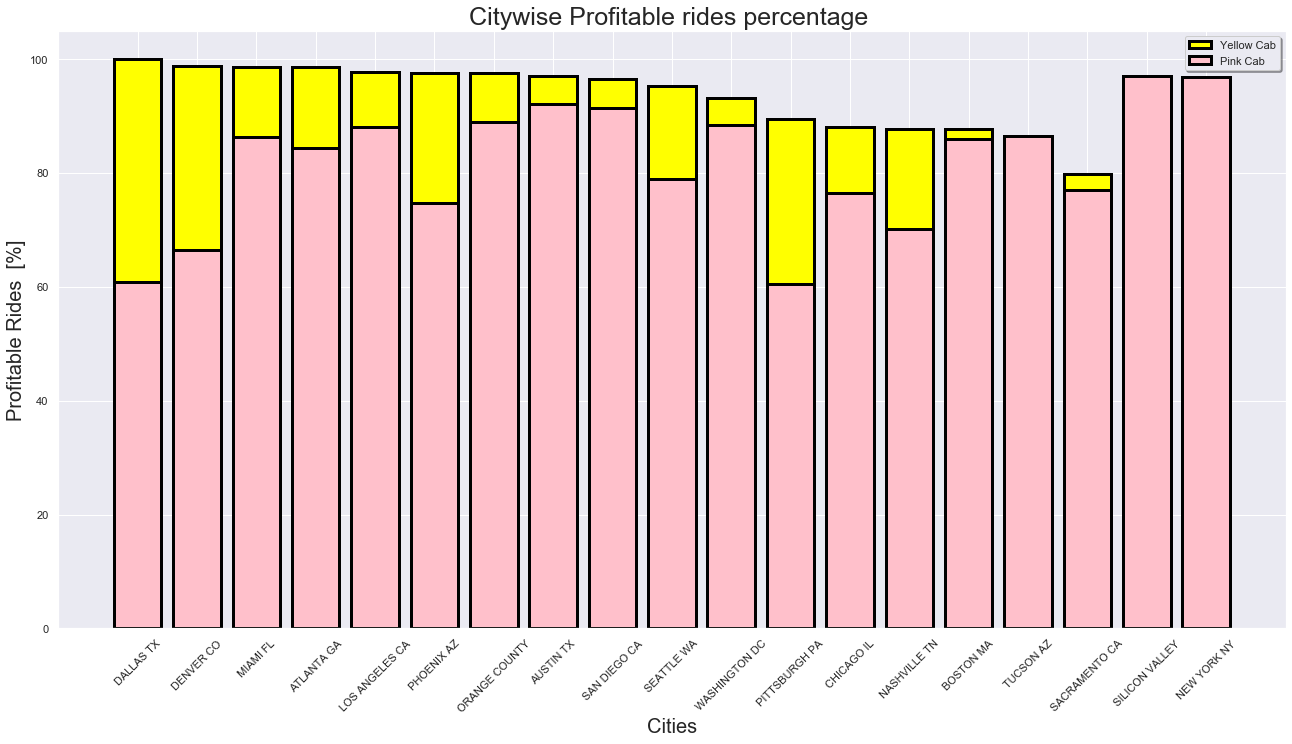

In [58]:
plt.figure(figsize=(22,11))
plt.bar(x= yellowcabnp.index, height='per', data = yellowcabnp,edgecolor = 'black',color = 'Yellow',linewidth=3,label='Yellow Cab',)
plt.bar(x= pinkcabnp.index, height='per', data = pinkcabnp,edgecolor = 'black',color = 'Pink',linewidth=3,label='Pink Cab',)
plt.xticks(rotation=45)
plt.ylabel('Profitable Rides  [%]', fontsize=20)
plt.title('Citywise Profitable rides percentage ', fontsize = 25)
plt.legend(loc='upper right', shadow=True)
plt.xlabel('Cities', fontsize=20)

In [59]:
pinkcabnp=pinkcabnp.reset_index()
yellowcabnp=yellowcabnp.reset_index()

In [60]:
pinkcabnp.columns=['City','Q','q','per']
yellowcabnp.columns=['City','Q','q','per']
pinkcabnp.head()

,City,Q,q,per
0,SILICON VALLEY,3680,117,96.918620
1,NEW YORK NY,13514,453,96.756641
2,AUSTIN TX,1719,149,92.023555
3,SAN DIEGO CA,9750,922,91.360570
4,ORANGE COUNTY,1346,167,88.962327


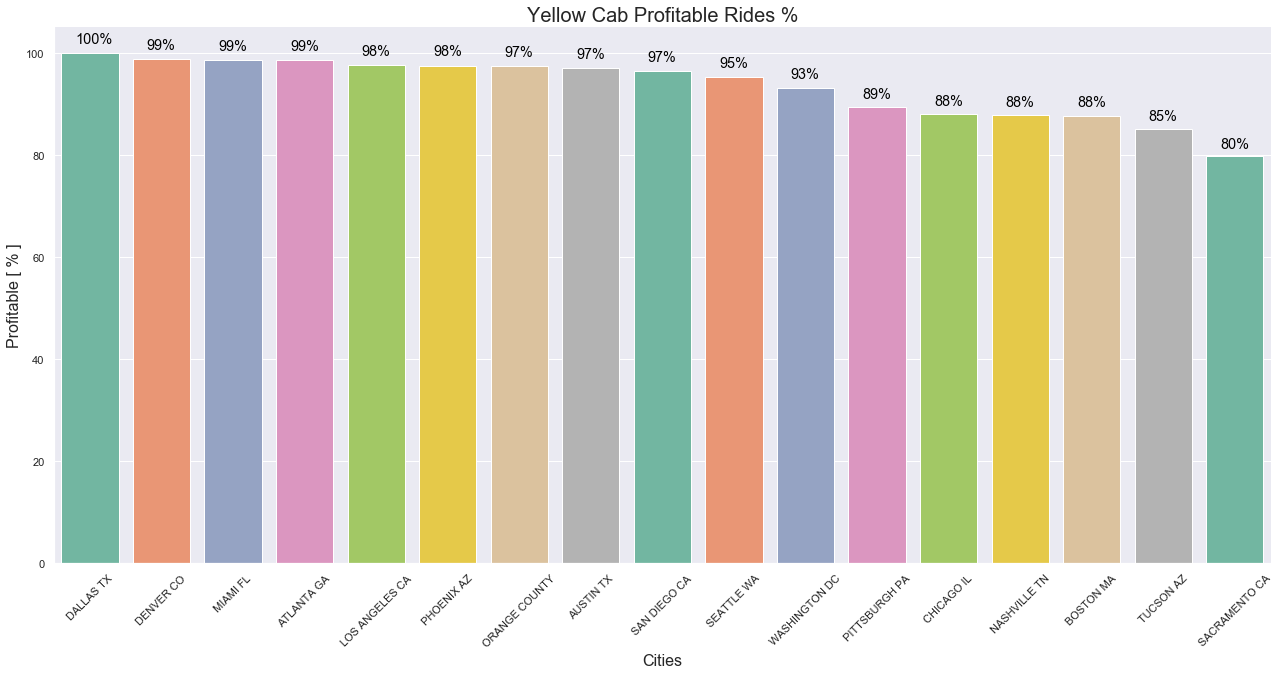

In [110]:
g=sns.catplot('City','per',data=yellowcabnp,kind='bar',palette = 'Set2', height=8.27, aspect=18/8.27)

ax = g.facet_axis(0,0)
for p in ax.patches:
    ax.text(p.get_x() + 0.195, 
            p.get_height() * 1.02, 
            "{:.0f}%".format(p.get_height()), 
            color='black', rotation='horizontal', size='large')
plt.ylabel('Profitable [ % ]', fontsize=16)
plt.xlabel('Cities', fontsize=16)
plt.title('Yellow Cab Profitable Rides %',fontsize=20)
plt.xticks(rotation=45)

plt.show()


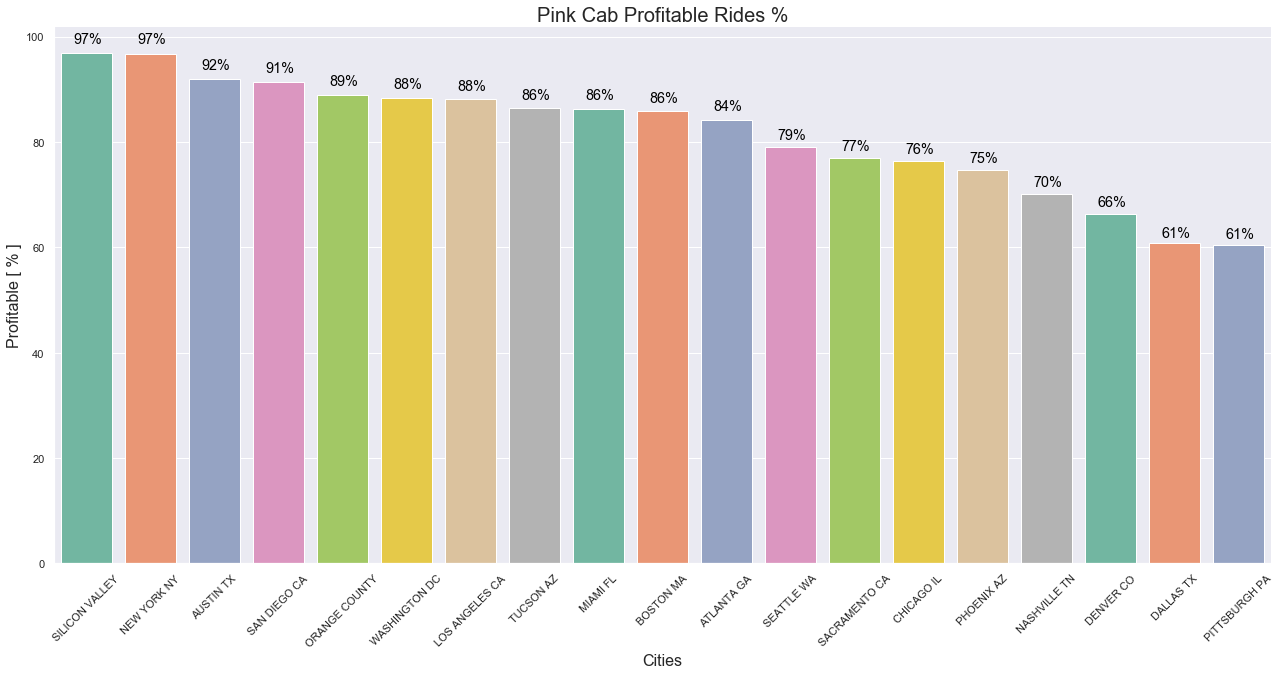

In [109]:
g=sns.catplot('City','per',data=pinkcabnp,kind='bar',palette = 'Set2', height=8.27, aspect=18/8.27)

ax = g.facet_axis(0,0)
for p in ax.patches:
    ax.text(p.get_x() + 0.195, 
            p.get_height() * 1.02, 
            "{:.0f}%".format(p.get_height()), 
            color='black', rotation='horizontal', size='large')
plt.ylabel('Profitable [ % ]', fontsize=16)
plt.xlabel('Cities', fontsize=16)
plt.title('Pink Cab Profitable Rides %',fontsize=20)
plt.xticks(rotation=45)
plt.show()


In [63]:
ypm

,Profit,ProfitORides,ProfitOKM
Date of Travel,,,
2016-01-31,8.535861e+05,224.332733,9.859264
2016-02-29,1.007479e+06,215.457425,9.554897
2016-03-31,9.181432e+05,176.430290,7.748110
2016-04-30,1.018717e+06,183.354379,8.046155
2016-05-31,1.208193e+06,210.817059,9.441918
2016-06-30,1.259600e+06,220.094361,9.750675
2016-07-31,1.016077e+06,149.621044,6.585174
2016-08-31,8.529732e+05,122.219979,5.390283
2016-09-30,1.394593e+06,164.476153,7.302560


In [65]:
ypm["Date"] = masterdata["Date"]

In [66]:
ypm

,Profit,ProfitORides,ProfitOKM,Date
Date of Travel,,,,
2016-01-31,8.535861e+05,224.332733,9.859264,NaT
2016-02-29,1.007479e+06,215.457425,9.554897,NaT
2016-03-31,9.181432e+05,176.430290,7.748110,NaT
2016-04-30,1.018717e+06,183.354379,8.046155,NaT
2016-05-31,1.208193e+06,210.817059,9.441918,NaT
2016-06-30,1.259600e+06,220.094361,9.750675,NaT
2016-07-31,1.016077e+06,149.621044,6.585174,NaT
2016-08-31,8.529732e+05,122.219979,5.390283,NaT
2016-09-30,1.394593e+06,164.476153,7.302560,NaT


In [67]:
ypm["Date"] = holidaydata["Date"]

In [68]:
ypm

,Profit,ProfitORides,ProfitOKM,Date
Date of Travel,,,,
2016-01-31,8.535861e+05,224.332733,9.859264,NaT
2016-02-29,1.007479e+06,215.457425,9.554897,NaT
2016-03-31,9.181432e+05,176.430290,7.748110,NaT
2016-04-30,1.018717e+06,183.354379,8.046155,NaT
2016-05-31,1.208193e+06,210.817059,9.441918,NaT
2016-06-30,1.259600e+06,220.094361,9.750675,NaT
2016-07-31,1.016077e+06,149.621044,6.585174,NaT
2016-08-31,8.529732e+05,122.219979,5.390283,NaT
2016-09-30,1.394593e+06,164.476153,7.302560,NaT


In [69]:
op = ypm.merge(holidaydata, on=['Date'])

In [70]:
op

,Profit,ProfitORides,ProfitOKM,Date,Holiday,WeekDay,Month,Day,Year


In [71]:
op.head()

,Profit,ProfitORides,ProfitOKM,Date,Holiday,WeekDay,Month,Day,Year


In [72]:
ypm

,Profit,ProfitORides,ProfitOKM,Date
Date of Travel,,,,
2016-01-31,8.535861e+05,224.332733,9.859264,NaT
2016-02-29,1.007479e+06,215.457425,9.554897,NaT
2016-03-31,9.181432e+05,176.430290,7.748110,NaT
2016-04-30,1.018717e+06,183.354379,8.046155,NaT
2016-05-31,1.208193e+06,210.817059,9.441918,NaT
2016-06-30,1.259600e+06,220.094361,9.750675,NaT
2016-07-31,1.016077e+06,149.621044,6.585174,NaT
2016-08-31,8.529732e+05,122.219979,5.390283,NaT
2016-09-30,1.394593e+06,164.476153,7.302560,NaT


In [73]:
ypm["Date"] =holidaydata["Date"]

In [74]:
ypm

,Profit,ProfitORides,ProfitOKM,Date
Date of Travel,,,,
2016-01-31,8.535861e+05,224.332733,9.859264,NaT
2016-02-29,1.007479e+06,215.457425,9.554897,NaT
2016-03-31,9.181432e+05,176.430290,7.748110,NaT
2016-04-30,1.018717e+06,183.354379,8.046155,NaT
2016-05-31,1.208193e+06,210.817059,9.441918,NaT
2016-06-30,1.259600e+06,220.094361,9.750675,NaT
2016-07-31,1.016077e+06,149.621044,6.585174,NaT
2016-08-31,8.529732e+05,122.219979,5.390283,NaT
2016-09-30,1.394593e+06,164.476153,7.302560,NaT


In [75]:
ypm = ypm.join(holidaydata["Date"])

ValueError: columns overlap but no suffix specified: Index(['Date'], dtype='object')

In [76]:
ypm.merge(masterdata, on='Date', how='left')

,Profit_x,ProfitORides,ProfitOKM,Date,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,...,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users,Year of Travel,Month of Travel,Day of Travel,Profit_y
0,8.535861e+05,224.332733,9.859264,NaT,10296112,2018-01-19,Yellow Cab,WASHINGTON DC,38.61,704.69,...,Cash,Male,59,3269.0,418859,127001,2018,1,19,236.7368
1,8.535861e+05,224.332733,9.859264,NaT,10307167,2018-03-01,Yellow Cab,WASHINGTON DC,43.29,726.51,...,Card,Male,59,3269.0,418859,127001,2018,3,1,207.0300
2,8.535861e+05,224.332733,9.859264,NaT,10313385,2018-03-22,Yellow Cab,WASHINGTON DC,30.68,506.22,...,Card,Male,59,3269.0,418859,127001,2018,3,22,97.5624
3,8.535861e+05,224.332733,9.859264,NaT,10361350,2018-08-12,Yellow Cab,WASHINGTON DC,35.10,497.63,...,Card,Male,59,3269.0,418859,127001,2018,8,12,42.7340
4,8.535861e+05,224.332733,9.859264,NaT,10389220,2018-10-11,Pink Cab,WASHINGTON DC,4.24,66.17,...,Card,Male,59,3269.0,418859,127001,2018,10,11,18.6820
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12925795,1.489678e+06,133.951772,5.947619,NaT,10433605,2018-12-24,Pink Cab,PITTSBURGH PA,21.66,345.03,...,Card,Female,48,27228.0,542085,3643,2018,12,24,98.1060
12925796,1.489678e+06,133.951772,5.947619,NaT,10433603,2018-12-27,Pink Cab,PITTSBURGH PA,6.79,119.55,...,Cash,Female,44,22278.0,542085,3643,2018,12,27,51.6500
12925797,1.489678e+06,133.951772,5.947619,NaT,10435910,2018-12-28,Yellow Cab,PITTSBURGH PA,18.81,372.10,...,Cash,Female,33,7830.0,542085,3643,2018,12,28,119.2936
12925798,1.489678e+06,133.951772,5.947619,NaT,10435908,2018-12-28,Yellow Cab,PITTSBURGH PA,30.80,538.31,...,Card,Female,32,22408.0,542085,3643,2018,12,28,124.3580


In [77]:
ypm

,Profit,ProfitORides,ProfitOKM,Date
Date of Travel,,,,
2016-01-31,8.535861e+05,224.332733,9.859264,NaT
2016-02-29,1.007479e+06,215.457425,9.554897,NaT
2016-03-31,9.181432e+05,176.430290,7.748110,NaT
2016-04-30,1.018717e+06,183.354379,8.046155,NaT
2016-05-31,1.208193e+06,210.817059,9.441918,NaT
2016-06-30,1.259600e+06,220.094361,9.750675,NaT
2016-07-31,1.016077e+06,149.621044,6.585174,NaT
2016-08-31,8.529732e+05,122.219979,5.390283,NaT
2016-09-30,1.394593e+06,164.476153,7.302560,NaT


In [78]:
ypm.head()

,Profit,ProfitORides,ProfitOKM,Date
Date of Travel,,,,
2016-01-31,8.535861e+05,224.332733,9.859264,NaT
2016-02-29,1.007479e+06,215.457425,9.554897,NaT
2016-03-31,9.181432e+05,176.430290,7.748110,NaT
2016-04-30,1.018717e+06,183.354379,8.046155,NaT
2016-05-31,1.208193e+06,210.817059,9.441918,NaT


In [79]:
def add_value_labels1(ax, spacing=5):
    """Add labels to the end of each bar in a bar chart.

    Arguments:
        ax (matplotlib.axes.Axes): The matplotlib object containing the axes
            of the plot to annotate.
        spacing (int): The distance between the labels and the bars.
    """

    # For each bar: Place a label
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        label = "{:.0f}".format(y_value)

        # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va, fontsize=12)                      # Vertically align label differently for
                                        # positive and negative values.


# Call the function above. All the magic happens there.
add_value_labels1(ax)

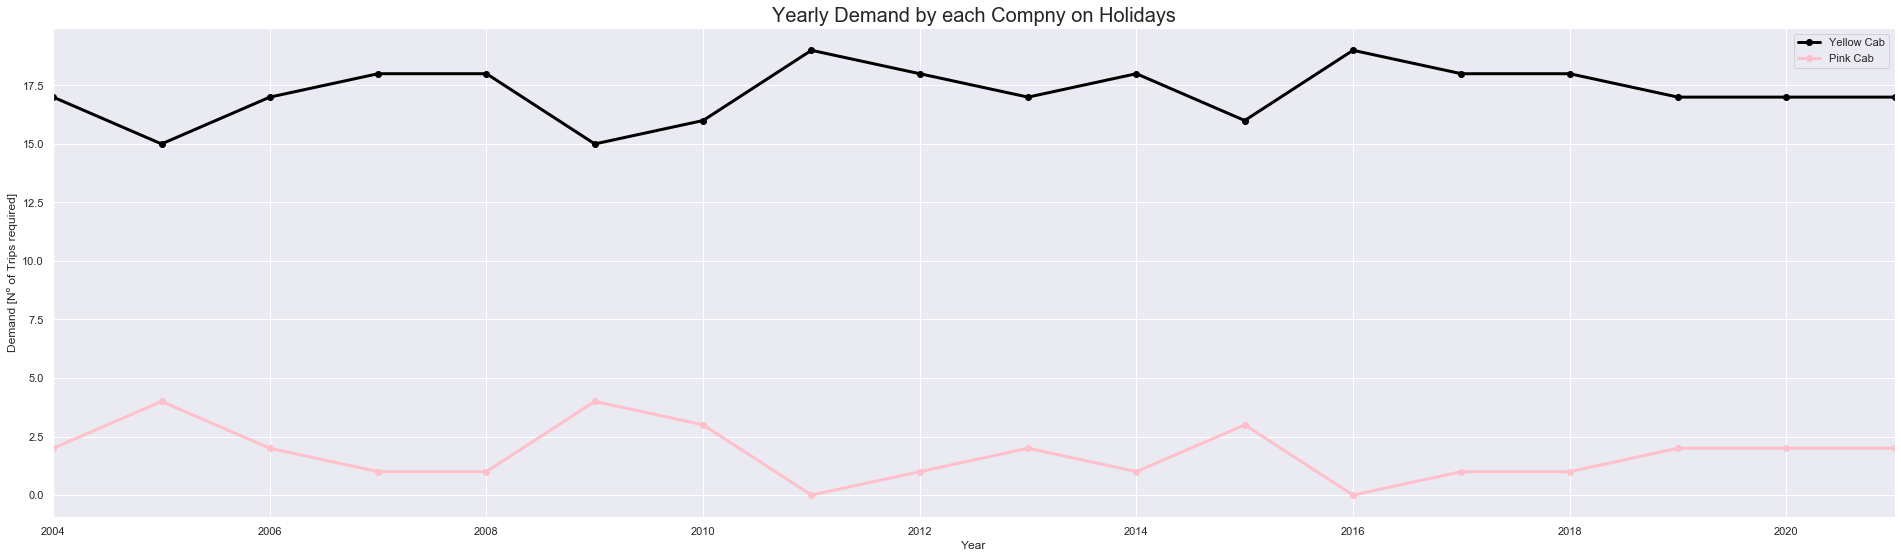

In [97]:
plt.figure(figsize=(33,9))

yellowcab['Date'].value_counts().resample('Y').sum().plot.line(color = 'Black',linewidth =3,marker='o')
pinkcab['Date'].value_counts().resample('Y').sum().plot.line(color = 'Pink',linewidth =3,marker='o')
plt.legend(['Yellow Cab', 'Pink Cab'])
plt.title('Yearly Demand by each Compny on Holidays',fontsize=20)
plt.ylabel('Demand [Nº of Trips required]')
plt.xlabel('Year')

plt.show()

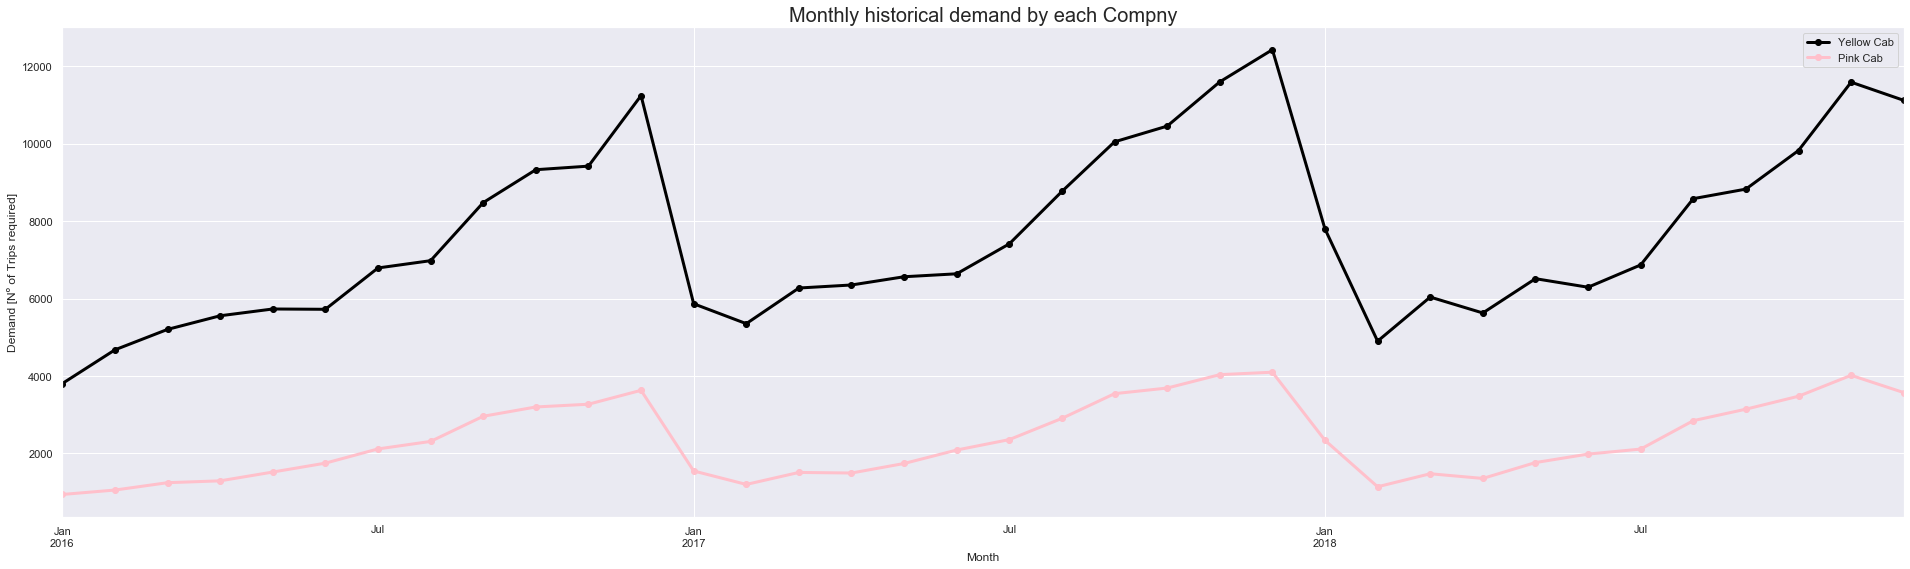

In [85]:
plt.figure(figsize=(33,9))

yellowcab['Date of Travel'].value_counts().resample('m').sum().plot.line(color = 'Black',label='Yellow Cab Company',linewidth=3, marker='o')
pinkcab['Date of Travel'].value_counts().resample('m').sum().plot.line(color = 'Pink',label='Pink Cab Company',linewidth=3,marker='o')
plt.legend(['Yellow Cab', 'Pink Cab'])
plt.title('Monthly historical demand by each Compny',fontsize=20)
plt.ylabel('Demand [Nº of Trips required]')
plt.xlabel('Month')
plt.show()

In [94]:
dpm=masterdata.groupby(['Company','Month of Travel'])['Transaction ID'].agg(['count'])
dpm=dpm.reset_index(level='Month of Travel', col_level=1)
dpm=dpm.reset_index(level='Company', col_level=1)
dpm = dpm.sort_values(by='count', ascending= False )

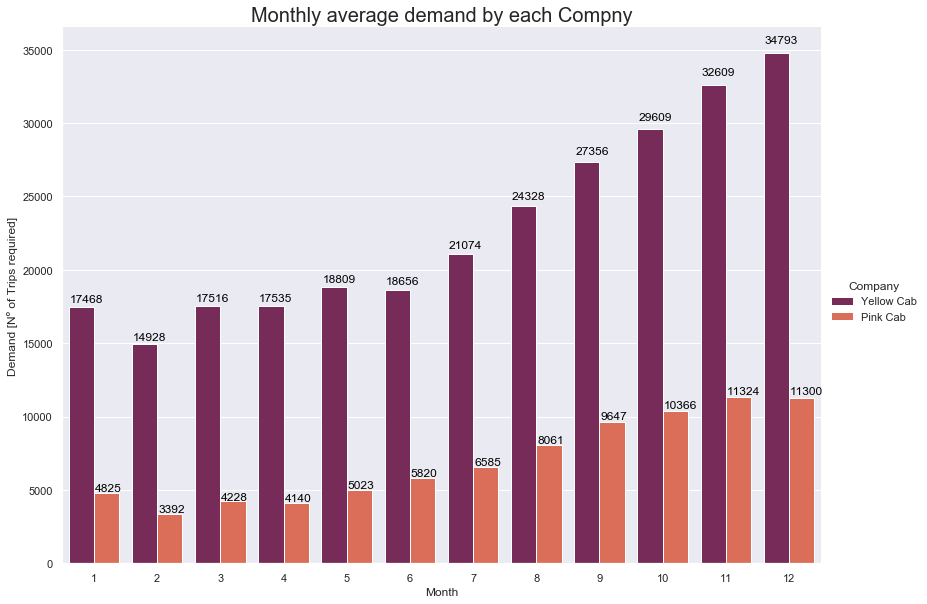

In [92]:
g=sns.catplot('Month of Travel','count',data=dpm,kind='bar',hue='Company',palette = 'rocket', height=8.27, aspect=11.7/8.27)

ax = g.facet_axis(0,0)
for p in ax.patches:
    ax.text(p.get_x() + 0.015, 
            p.get_height() * 1.02, 
            "{:.0f}".format(p.get_height()), 
            color='black', rotation='horizontal', size='medium')
plt.title('Monthly average demand by each Compny',fontsize=20)
plt.ylabel('Demand [Nº of Trips required]')
plt.xlabel('Month')
plt.show()

In [95]:
masterdata

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users,Date,Year of Travel,Month of Travel,Day of Travel,Profit
0,10001340,2016-01-01,Yellow Cab,WASHINGTON DC,10.20,202.54,135.8640,52536,Card,Male,24,10606.0,418859,127001,2004-07-04,2016,1,1,66.6760
1,10020018,2016-03-25,Yellow Cab,WASHINGTON DC,5.94,88.50,74.1312,52536,Cash,Male,24,10606.0,418859,127001,2005-07-04,2016,3,25,14.3688
2,10102932,2016-11-08,Pink Cab,WASHINGTON DC,15.21,179.33,153.6210,52536,Cash,Male,24,10606.0,418859,127001,2006-07-04,2016,11,8,25.7090
3,10164725,2017-04-16,Yellow Cab,WASHINGTON DC,8.08,123.21,104.7168,52536,Card,Male,24,10606.0,418859,127001,2007-07-04,2017,4,16,18.4932
4,10188478,2017-06-23,Yellow Cab,WASHINGTON DC,13.80,283.74,168.9120,52536,Cash,Male,24,10606.0,418859,127001,2008-07-04,2017,6,23,114.8280
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10433605,2018-12-24,Pink Cab,PITTSBURGH PA,21.66,345.03,246.9240,49629,Card,Female,48,27228.0,542085,3643,NaT,2018,12,24,98.1060
359388,10433603,2018-12-27,Pink Cab,PITTSBURGH PA,6.79,119.55,67.9000,49372,Cash,Female,44,22278.0,542085,3643,NaT,2018,12,27,51.6500
359389,10435910,2018-12-28,Yellow Cab,PITTSBURGH PA,18.81,372.10,252.8064,48042,Cash,Female,33,7830.0,542085,3643,NaT,2018,12,28,119.2936
359390,10435908,2018-12-28,Yellow Cab,PITTSBURGH PA,30.80,538.31,413.9520,48061,Card,Female,32,22408.0,542085,3643,NaT,2018,12,28,124.3580


In [98]:
a1=masterdata[(masterdata['Age']>18) & (masterdata['Age']<25)]
a2=masterdata[(masterdata['Age']>26) & (masterdata['Age']<40)]
a3=masterdata[(masterdata['Age']>41) & (masterdata['Age']<60)]
a4=masterdata[(masterdata['Age']>60)]

a11= a1.groupby(['Company','Year of Travel'])['Customer ID'].agg(['count'])
a11.columns=['Total Customers']
a11=a11.reset_index(level='Year of Travel', col_level=1)
a11=a11.reset_index(level='Company', col_level=1)
a11['Class']= '18-25'
a22= a2.groupby(['Company','Year of Travel'])['Customer ID'].agg(['count'])
a22.columns=['Total Customers']
a22=a22.reset_index(level='Year of Travel', col_level=1)
a22=a22.reset_index(level='Company', col_level=1)
a22['Class']= '26-40'
a33= a3.groupby(['Company','Year of Travel'])['Customer ID'].agg(['count'])
a33.columns=['Total Customers']
a33=a33.reset_index(level='Year of Travel', col_level=1)
a33=a33.reset_index(level='Company', col_level=1)
a33['Class']= '40-60'
a44= a4.groupby(['Company','Year of Travel'])['Customer ID'].agg(['count'])
a44.columns=['Total Customers']
a44=a44.reset_index(level='Year of Travel', col_level=1)
a44=a44.reset_index(level='Company', col_level=1)
a44['Class']= '60+'

agegroup=a11
agegroup=pd.concat([agegroup,a22,a33,a44])
agegroup['Total Customers']=agegroup['Total Customers'].astype(int)
agegroup.head(5)

,Company,Year of Travel,Total Customers,Class
0,Pink Cab,2016,4885,18-25
1,Pink Cab,2017,5985,18-25
2,Pink Cab,2018,5760,18-25
3,Yellow Cab,2016,16196,18-25
4,Yellow Cab,2017,19174,18-25


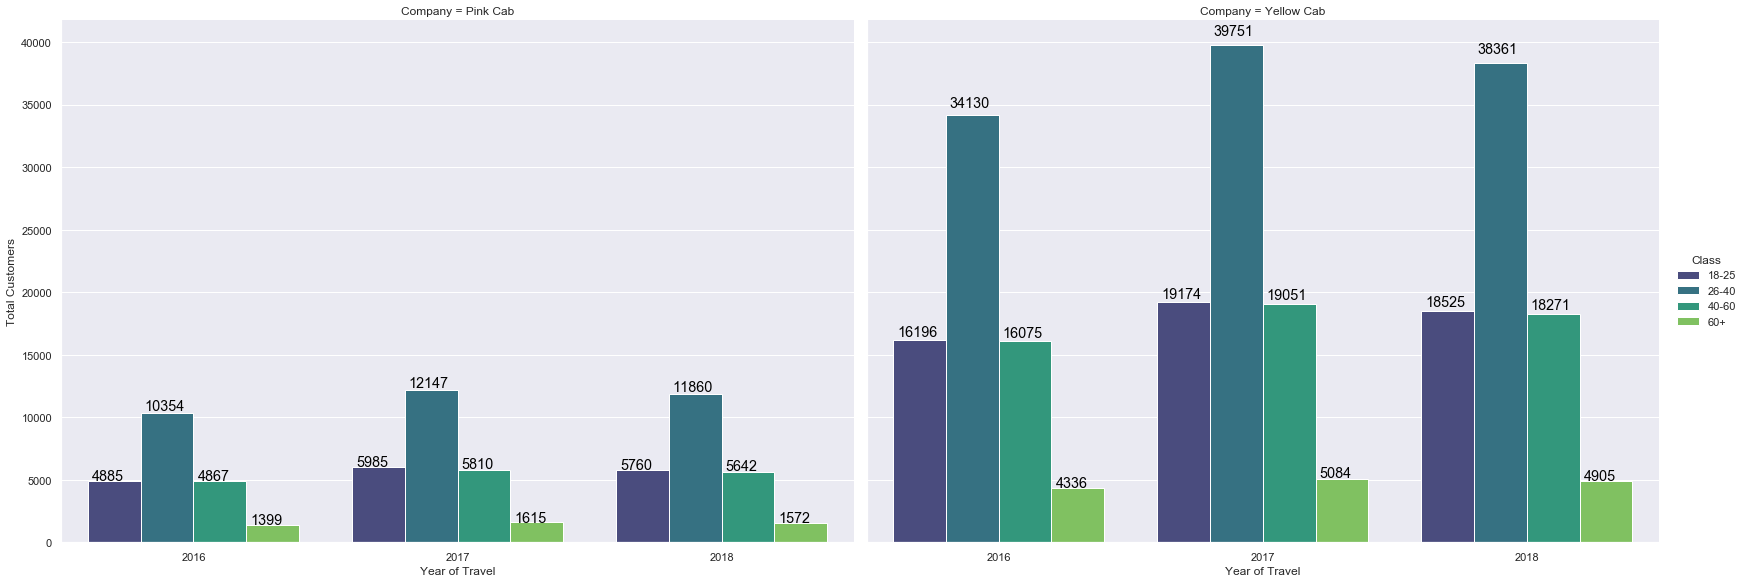

In [103]:
g=sns.catplot('Year of Travel','Total Customers',data=agegroup,col= 'Company',kind='bar',hue='Class',palette = 'viridis', height=8.27, aspect=11.7/8.27)

ax = g.facet_axis(0,0)
for p in ax.patches:
    ax.text(p.get_x() + 0.015, 
            p.get_height() * 1.02, 
            "{:.0f}".format(p.get_height()), 
            color='black', rotation='horizontal', size='large')
ax = g.facet_axis(0,1)
for p in ax.patches:
    ax.text(p.get_x() + 0.015, 
            p.get_height() * 1.02, 
            "{:.0f}".format(p.get_height()), 
            color='black', rotation='horizontal', size='large')
plt.show()

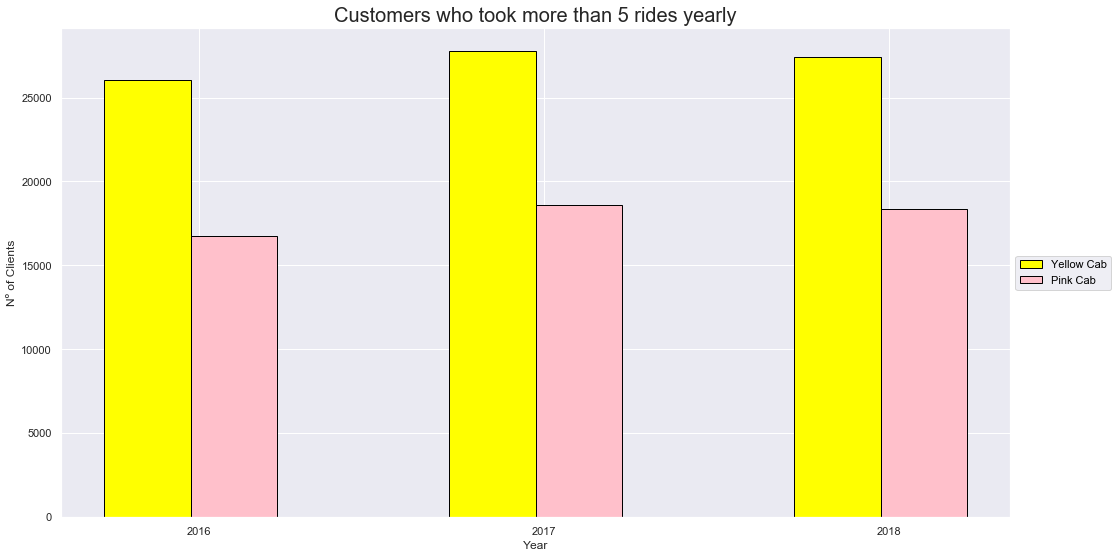

In [115]:
years=[2016,2017,2018]
c10r_y=[]
c10r_p=[]
for year in years:
  yellow_year=masterdata[(masterdata['Year of Travel']==year) & (masterdata['Company']=='Yellow Cab')].groupby('Customer ID')['Company'].agg(['count'])
  yellow_year.reset_index(inplace=True)
  yellow_year[yellow_year['count']>=5]
  c10r_y.append(len(yellow_year))
  pink_year=masterdata[(masterdata['Year of Travel']==year) & (masterdata['Company']=='Pink Cab')].groupby('Customer ID')['Company'].agg(['count'])
  pink_year.reset_index(inplace=True)
  pink_year[pink_year['count']>=5]
  c10r_p.append(len(pink_year))

plt.figure(figsize=(17,9))
X = np.arange(3)
plt.bar(X+0.00,c10r_y,color='yellow', label='Yellow Cab', width= 0.25,edgecolor='black')
plt.bar(X+0.25,c10r_p,color='pink',label='Pink Cab',width = 0.25,edgecolor='black')
plt.xticks(X+0.15,['2016','2017','2018'])
leg=plt.gca().legend(loc='center left',bbox_to_anchor = (1,0.5))
plt.setp(leg.get_texts(), color='black')
plt.title('Customers who took more than 5 rides yearly',fontsize=20)
plt.ylabel('Nº of Clients')
plt.xlabel('Year')
plt.show()

In [116]:
u=masterdata.groupby(['Year of Travel'])['Transaction ID'].agg(['count'])
u.columns = ['RidesPerYear']
u=u.reset_index(level='Year of Travel', col_level=1)
payment=masterdata.groupby(['Year of Travel','Payment_Mode'])['Transaction ID'].agg(['count'])
payment=payment.reset_index(level='Year of Travel', col_level=1)
payment=payment.reset_index(level='Payment_Mode', col_level=1)
payment=payment.merge(u,on= 'Year of Travel')
payment.head()
payment1=payment
payment1['per']=payment1['count']/payment1['RidesPerYear']
payment.head()
Payment_Mode	

NameError: name 'Payment_Mode' is not defined

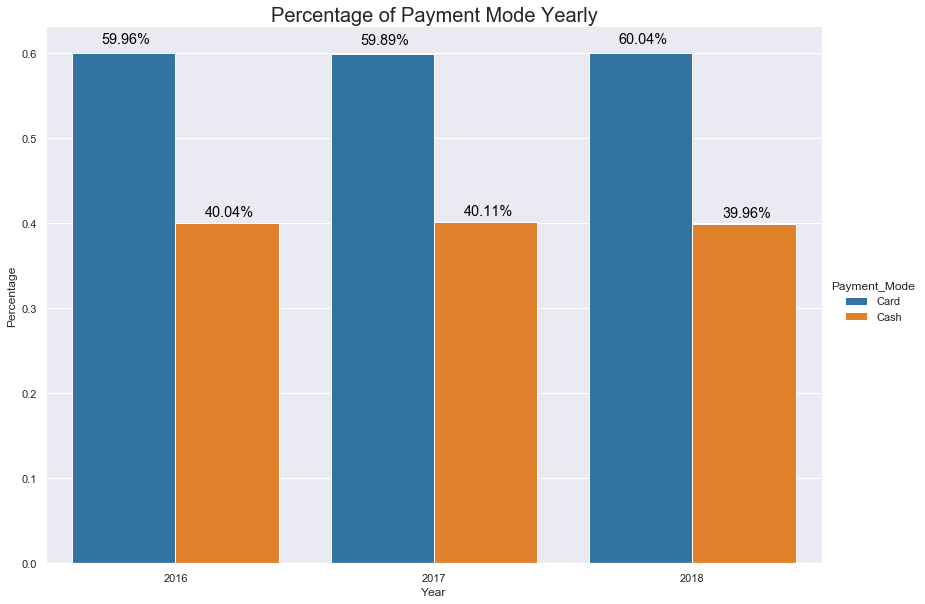

In [120]:
g=sns.catplot('Year of Travel','per',data=payment1,kind='bar',hue='Payment_Mode',palette="tab10", height=8.27, aspect=11.7/8.27)
plt.title('Percentage of Payment Mode Yearly',fontsize=20)
plt.xlabel('Year')
plt.ylabel('Percentage')
ax = g.facet_axis(0,0)
for p in ax.patches:
    ax.text(p.get_x() + 0.115, 
            p.get_height() * 1.02, 
            "{:.2f}%".format(p.get_height()*100), 
            color='black', rotation='horizontal', size='large')
plt.show()
